<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Data</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Preprocess-Data" data-toc-modified-id="Preprocess-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocess Data</a></span><ul class="toc-item"><li><span><a href="#Remove-Id-column-and-continue-exploring" data-toc-modified-id="Remove-Id-column-and-continue-exploring-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Remove Id column and continue exploring</a></span></li><li><span><a href="#Make-score-binary" data-toc-modified-id="Make-score-binary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Make score binary</a></span></li><li><span><a href="#Find-null-values-in-df_X" data-toc-modified-id="Find-null-values-in-df_X-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Find null values in df_X</a></span><ul class="toc-item"><li><span><a href="#No-null-values-in-df_X" data-toc-modified-id="No-null-values-in-df_X-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>No null values in df_X</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Similar-value-counts-for-train/test?" data-toc-modified-id="Similar-value-counts-for-train/test?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Similar value counts for train/test?</a></span></li></ul></li></ul></div>

# Summary
* This data challenge involves regression task. The target variable is 'score' that captures medical condition of a patient. Independent variables capture patient related data that can influence the target variable 'score'. First variable in the train.csv data file identifies each patient record uniquely.

* The challenge is to correctly predict value for 'score' based on independent variables.

# Import Libraries

In [45]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Explore Data

     Id   score       V3        V4       V5       V6       V7       V8     V9  \
0   403  34.130  0.00243  0.000018  0.00108  0.00124  0.00323  0.01147  0.105   
1  1477  19.000  0.00280  0.000021  0.00087  0.00128  0.00260  0.01575  0.137   
2  5342  43.104  0.00412  0.000028  0.00162  0.00213  0.00487  0.02644  0.242   
3  3812  38.814  0.00781  0.000043  0.00451  0.00399  0.01353  0.02975  0.261   
4   138  41.034  0.00488  0.000026  0.00265  0.00251  0.00794  0.04983  0.448   

       V10  ...       V20       V21       V22       V23       V24       V25  \
0  0.00625  ... -0.824511 -1.217875 -0.432389 -1.455320 -0.280675  0.681113   
1  0.00812  ...  0.080466 -0.812559  1.512731  0.070331  2.368754 -0.256309   
2  0.01150  ... -0.060555 -0.027766 -0.123652  0.820478  1.054439  1.922146   
3  0.01650  ... -0.153332 -1.298289  1.410486  1.950012  0.613255  0.492419   
4  0.02688  ... -0.985639 -0.469064 -2.579920  0.173884 -0.330941  0.089597   

        V26       V27       V28       

Id        score           V3           V4           V5  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean   2940.652499    29.121340     0.006104     0.000044     0.002964   
std    1699.192364    10.755535     0.005490     0.000035     0.003076   
min       1.000000     7.000000     0.000830     0.000002     0.000330   
25%    1475.000000    21.371000     0.003600     0.000023     0.001590   
50%    2946.000000    27.630000     0.004900     0.000035     0.002250   
75%    4415.000000    36.483000     0.006770     0.000053     0.003270   
max    5873.000000    54.992000     0.099990     0.000446     0.057540   

                V6           V7           V8           V9          V10  ...  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000  ...   
mean      0.003245     0.008893     0.034051     0.311054     0.017160  ...   
std       0.003616     0.009229     0.025476     0.227168     0.013016  ...   
min       0.000430     0.000980     0.003060     0.026000     0.001610  ...   
25%       0.001830     0.004780     0.019260     0.177000     0.009310  ...   
50%       0.002480     0.006760     0.027750     0.255000     0.013770  ...   
75%       0.003430     0.009800     0.039990     0.366000     0.020690  ...   
max       0.069560     0.172630     0.239150     1.970000     0.162670  ...   

               V20          V21          V22          V23          V24  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean     -0.012633    -0.025192    -0.000963     0.014772     0.008972   
std       1.001635     1.000682     1.008123     0.989822     0.996655   
min      -3.380800    -3.478111    -3.477503    -3.640632    -4.101566   
25%      -0.686830    -0.710558    -0.684078    -0.653262    -0.667845   
50%      -0.016551    -0.041247     0.010535     0.019838     0.012707   
75%       0.656291     0.660537     0.662715     0.676001     0.678279   
max       3.521048     4.089038     3.415772     3.771027     3.904879   

               V25          V26          V27          V28          V29  
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000  
mean     -0.007462    -0.016772    -0.000486    -0.005106    -0.018972  
std       0.988960     1.026635     1.000286     0.990513     1.003466  
min      -3.325202    -4.181709    -3.271369    -3.914810    -3.940039  
25%      -0.677333    -0.710010    -0.684800    -0.667930    -0.719007  
50%      -0.014778    -0.022363    -0.017580    -0.020160    -0.018618  
75%       0.649582     0.657142     0.643342     0.641950     0.659158  
max       3.628111     4.551681     3.833876     3.459594     3.540049  

[8 rows x 29 columns]

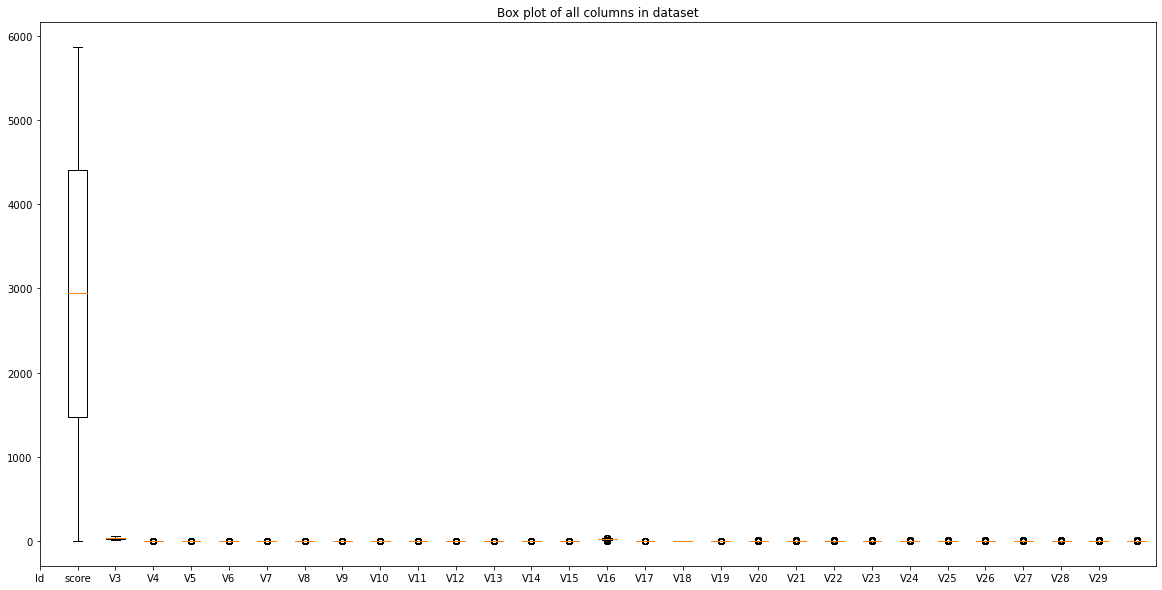

In [7]:
# import csv
df = pd.read_csv('data/train.csv')
print(df.head())
print()
# Explore the dataset
print(df.info())
print()

# Interpret values of columns
display(df.describe())

# Create a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()


## Summary
* Drop Id column - irrelevant for making predictions
    * Continue exploration after drop
* All data is int64 or float
* Recommend normalizing data due to order of magnitude differences in predictors 

# Preprocess Data

## Remove Id column and continue exploring

In [8]:
# Make a copy of data frame 
df1 = df.copy()

# Make a data frame for score
score = df1['score']

# Drop Id and score columns
df_X = df1.drop(columns=['Id','score'], axis=1)


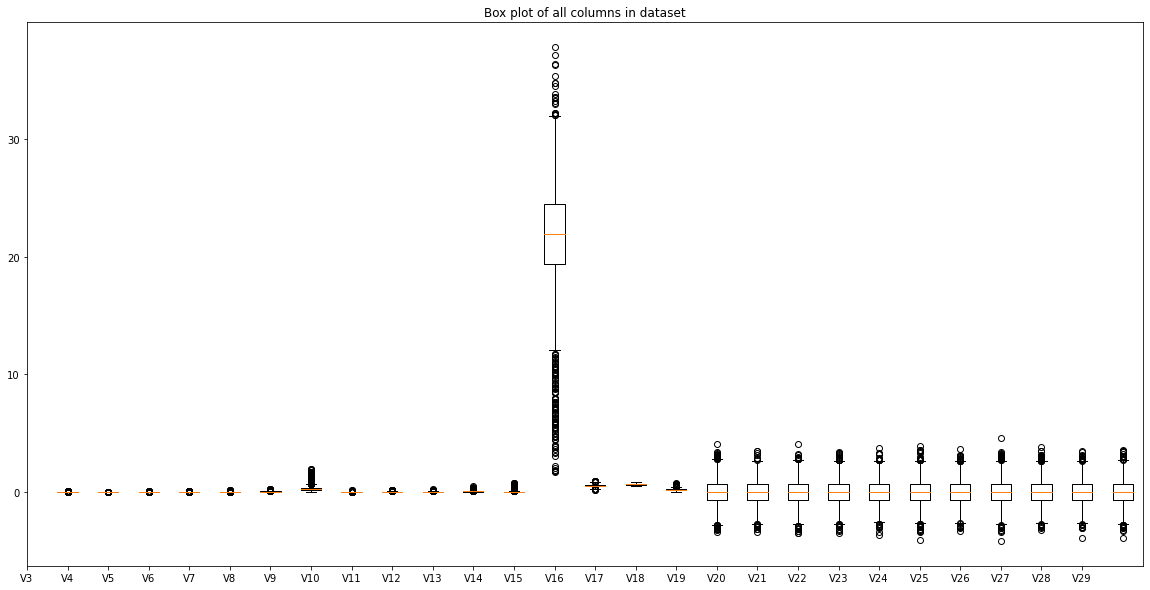

In [9]:
# Re-print box and whiskers
# Create a box plot of each column for df1
plt.figure(figsize=(20, 10))
plt.boxplot([df_X[col] for col in df_X.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df_X.columns.values)), df_X.columns.values)
plt.show()

## Make score binary
* To allow practice with binary classifier.

In [11]:
score.describe()

count    4141.000000
mean       29.121340
std        10.755535
min         7.000000
25%        21.371000
50%        27.630000
75%        36.483000
max        54.992000
Name: score, dtype: float64

In [14]:
score.head()

0    34.130
1    19.000
2    43.104
3    38.814
4    41.034
Name: score, dtype: float64

In [31]:
score.shape

(4141,)

In [21]:
scores = list(score)

In [35]:
for value in scores:
    if scores[value] > 29.121340:
        scores[value] = 1
    else:
        scores[value] = 0
    print(scores)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [36]:
score_df = pd.DataFrame(scores, columns = ['score'])
score_df.value_counts()

score
1        2250
0        1891
dtype: int64

In [37]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   4141 non-null   int64
dtypes: int64(1)
memory usage: 32.5 KB


In [49]:
# Percent likelihood of random guess ~54% likely to be high score
print("Percentages")
print(score_df.value_counts(normalize=True))

Percentages
score
1        0.543347
0        0.456653
dtype: float64


In [38]:
y = score_df

## Find null values in df_X
* df_X is the X data frame - all independent variables

In [43]:
# sum null values for each feature
df_X.isnull().sum()

V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
dtype: int64

### No null values in df_X
* Surprising and helpful.

# Logistic Regression

In [50]:
# Define X and y
y = score_df
X = df_X

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

score
1        1687
0        1418
dtype: int64 

 score
1        563
0        473
dtype: int64


## Similar value counts for train/test?

In [51]:
# percent value counts
print("Train percent high/low:", y_train.value_counts(normalize=True)[1])
print("Test percent high/low: ", y_test.value_counts(normalize=True)[1])

Train percent high/low: score
1        0.543317
dtype: float64
Test percent high/low:  score
1        0.543436
dtype: float64
